# **Classification of Text Documents using Naive Bayes**

In natural language processing and machine learning Naive Bayes is a popular method for classifying text documents. It can be used to classifies documents into pre defined types based on likelihood of a word occurring by using Bayes theorem. In this article we will implement Text Classification using Naive Bayes in Python.

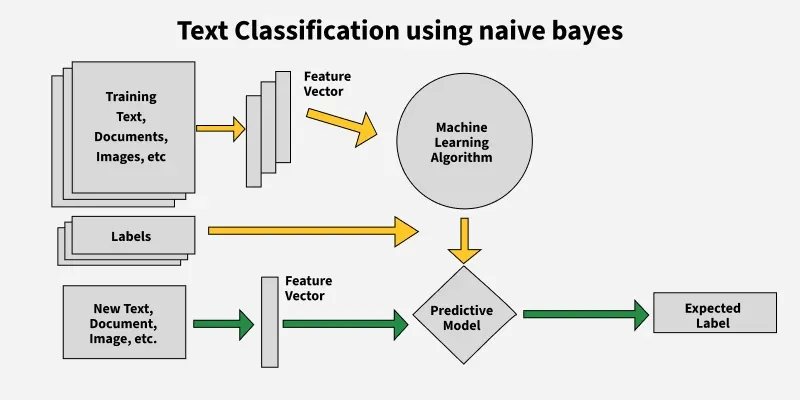

**1. Importing Libraries**

We will need to import the necessary libraries like scikit-learn, Pandas and Numpy.

* CountVectorizer to convert text data into numerical features using word counts.
* MultinomialNB: The Naive Bayes classifier for multinomial data and is ideal for text classification.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from seaborn import heatmap
import seaborn as sns

**2. Loading the Dataset**

Here we will load our dataset.

In [2]:
data = pd.read_csv('/content/sample_data/synthetic_text_data.csv')
X = data['text']
y = data['label']

**3. Splitting the Data**

Now we split the dataset into training and testing sets. The training set is used to train the model while the testing set is used to evaluate its performance.

* train_test_split: Splits the data into training (80%) and testing (20%) sets.
* random_state: ensures reproducibility.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Text Preprocessing: Converting Text to Numeric Features**

We need to convert the text data into numerical format before feeding it to the model. We use CountVectorizer to convert the text into a matrix of token counts.

* CountVectorizer(): Converts the raw text into a matrix of word counts.
* fit_transform(): Learns the vocabulary from the training data and transforms the text into vector.
* transform(): Applies the learned vocabulary from the training data to the test data.

In [5]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

**5. Training the Naive Bayes Classifier**

With the data now in the right format we train the Naive Bayes classifier on the training data. Here we use Multinomial Naive Bayes.

In [6]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

**6. Making Predictions**

Now that the model is trained we can use it to predict the labels for the test data using X_test_vectorized.

In [7]:
y_pred = model.predict(X_test_vectorized)

**7. Evaluating the Model**

After making predictions we need to evaluate the model's performance. We'll calculate the accuracy and confusion matrix to understand how well the model is performing.

* accuracy_score(): Calculates the accuracy of the model by comparing the predicted labels (y_pred) with the true labels (y_test).
* confusion_matrix(): Generates a confusion matrix to visualize how well the model classifies each category.

Accuracy: 88.23529411764706%


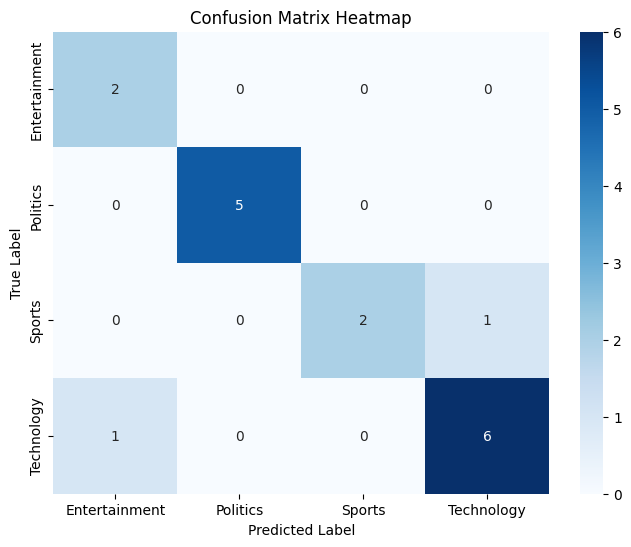

In [12]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy *100}%')

class_labels = np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**8. Prediction on Unseen Data**

In [13]:
user_input = ("I love artificial intelligence and machine learning")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Technology' category.
